<a href="https://colab.research.google.com/github/imceballos/LogisticRegression/blob/master/networkx_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from operator import itemgetter
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('directores.xlsx')

In [3]:
df.head()

,RUT,Nombre,Cargo,Fecha Nombramiento,Directorio
0,70563495,PABLO TURNER GONZÁLEZ,Presidente,2018-08-27,1
1,68617421,JAIME FERNANDO SANTA CRUZ NEGRI,Vicepresidente,2018-08-27,1
2,63702153,DIEGO VIDAL SANCHEZ,Director,2018-08-27,1
3,68334543,FRESIA MARGARITA HANCKES ESTEFAN,Director,2018-08-27,1
4,6861743K,JUAN PABLO SANTA CRUZ NEGRI,Director,2018-08-27,1


In [4]:
df['RUT'] = df['RUT'].astype(str)

In [5]:
df.set_index('RUT', inplace=True)

In [6]:
names = df['Nombre'].to_dict()

In [7]:
def intersection(lst1, lst2): 
    return len(list(set(lst1) & set(lst2))) 

In [8]:
df.drop(index='0E (Extranjero)', inplace=True)

In [9]:
dict_of_rut = df.loc[:]['Directorio'].groupby('RUT').apply(list).to_dict()

In [10]:
column = dict_of_rut.keys()

In [11]:
all_rows = []
for j in dict_of_rut.keys():
    row = []
    for k in dict_of_rut.keys():
        row.append(intersection(dict_of_rut[j],dict_of_rut[k]))
    all_rows.append(row)

In [12]:
len(all_rows)

1594

In [13]:
df_final = pd.DataFrame(data = all_rows, index = column, columns = column)

In [14]:
df_final.shape

(1594, 1594)

In [20]:
G = nx.from_pandas_adjacency(df_final)

In [21]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1594\nNumber of edges: 8522\nAverage degree:  10.6926'

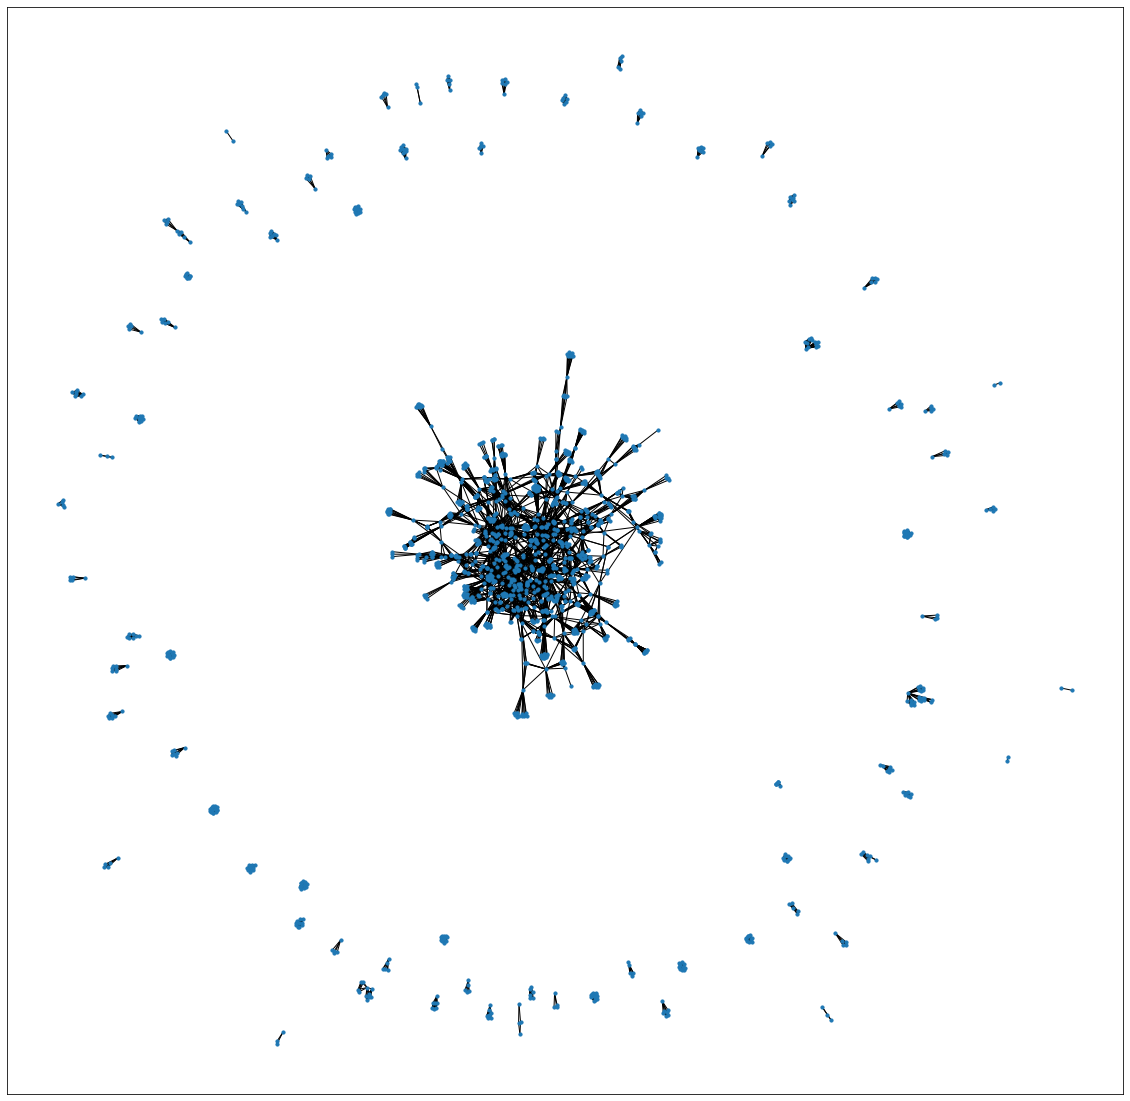

In [22]:
sp = nx.spring_layout(G)
plt.figure(figsize=(20,20))
nx.draw_networkx(G,pos=sp, with_labels=False, node_size= 10)
plt.show()

In [23]:
nx.set_node_attributes(G, names, 'name')

In [24]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [25]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)


In [26]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(G._node[d[0]]['name'],G._node[d[0]]['degree'])

Top 5 nodes by degree:
HERMAN CHADWICK PIÑERA 43
CARLOS ALBERTO HELLER SOLARI 40
HERNAN ALBERTO BÜCHI BUC 37
LEONIDAS VIAL ECHEVERRÍA 37
MIGUEL IGNACIO GUERRERO GUTIERREZ 33


In [27]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [28]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by betweenness centrality:")
for d in sorted_betweenness[:5]:
    print(G._node[d[0]]['name'], G._node[d[0]]['betweenness'])

Top 5 nodes by betweenness centrality:
HERNAN ALBERTO BÜCHI BUC 0.060496182395394324
HERMAN CHADWICK PIÑERA 0.03471252394407416
CARLOS FRANCISCO CÁCERES CONTRERAS 0.03448894650230503
FRANCISCO GARDEWEG OSSA 0.03355856319852467
BALTAZAR SÁNCHEZ GUZMÁN 0.031310536469195877


In [29]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by eigenvector centrality:")
for d in sorted_eigenvector[:5]:
    print((G._node[d[0]]['name']), (G._node[d[0]]['eigenvector']))

Top 5 nodes by eigenvector centrality:
RAMIRO MÉNDEZ URRUTIA 0.25065407216078167
PEDRO BARRÍA SCHULZ 0.23335895773610782
JORGE LEMBEYE ILLANES 0.23335895773610782
NICOLAS CORREA FERRER 0.23335895773610782
JUAN CARLOS BALMACEDA PEÑAFIEL 0.23335895773610782


In [30]:
from networkx.readwrite import json_graph
import json

In [32]:
data1 = json_graph.node_link_data(G)
s1 = json.dumps(data1)
with open('networkdata1.json', 'w') as outfile1:
    outfile1.write(s1)